# **CAPSTONE PROJECT MODULE 2 (SuperMarket) - Subhan's Store** 

# Latar Belakang
Sebuah perusahaan yang bergerak di bidang retail (SuperMarket) yang bernama Subhan's Store, ingin merekrut *data scientist*. Subhan's Store ingin mengetahui strategi seperti apa yang dapat diterapkan untuk menarik pelanggan baru. 

# Stakeholder
Marketing Manager dari Supermarket Subhan's Store

# Pernyataan Masalah
Perusahaan ingin mengetahui bagaimana cara meningkatkan penjualannya melalui program kampanye mereka. Informasi ini akan membantu perusahaan untuk program kampanye mereka kedepannya bisa lebih efektif.



# Rumusan Masalah

1. Mengidentifikasi segmen pasar agar lebih efektif.
    - Apakah terdapat pengaruh antara usia dan minat dalam berbelanja?
    - Apakah status pernikahan pelanggan terdapat hubungan dengan pembelian?
    - Apakah ada perbedaan dalam pola pembelian produk yang memiliki latar belakang pendidikan yang berbeda?

2. Strategi kampanye seperti apa yang dapat diterapkan untuk menarik pelanggan baru dan meningkatkan penjualan?

# Data


In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait pelanggan, Product, Promotion, dan Purchase Place. Ada 29 kolom di dalam dataset Supermarket Customers, yaitu:

Customer
* ID : Pengenal pelanggan (Unik untuk setiap pelanggan)
* Year_Birth : Tahun kelahiran pelanggan
* Education : Jenjang pendidikan terakhir pelanggan
* Marital_Status : Status pernikahan pelanggan
* Income : Pendapatan tahunan pelanggan
* Kidhome : Jumlah anak-anak dirumah pelanggan
* Teenhome : Jumlah remaja dirumah pelanggan
* Dt_Customer : Tanggal pelanggan terdaftar di supermarket ini
* Recency : Jumlah hari sejak pembelian terakir pelanggan
* Complain : 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya

Product
* MntWines : Jumlah pembelian wine dalam 2 tahun terakir
* MntFruits : Jumlah pembelian buah dalam 2 tahun terakir
* MntMeatProducts : Jumlah pembelian daging dalam 2 tahun terakir
* MntFishProducts : Jumlah pembelian ikan dalam 2 tahun terakir
* MntSweetProducts : Jumlah pembelian permen dalam 2 tahun terakir
* MntGoldProds : Jumlah pembelian emas dalam 2 tahun terakir

Promotion
* NumDealsPurchases : Jumlah pembelian yang dilakukan dengan diskon
* AcceptedCmp1 : 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak
* AcceptedCmp2 : 2 jika pelanggan menerima penawaran di kampanye kedua, 0 jika tidak
* AcceptedCmp3 : 3 jika pelanggan menerima penawaran di kampanye ketiga, 0 jika tidak
* AcceptedCmp4 : 4 jika pelanggan menerima penawaran di kampanye keempat, 0 jika tidak
* AcceptedCmp5 : 5 jika pelanggan menerima penawaran di kampanye kelima, 0 jika tidak
* Response : 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak

Purchase_Place
* NumWebPurchases : Jumlah pembelian yang dilakukan melalui website supermarket
* NumCatalogPurchases : Jumlah pembelian yang dilakukan melalui catalog
* NumStorePurchases : Jumlah pembelian yang dilakukan melalui datang langsung di supermarket
* NumWebVisitsMonth :Jumlah kunjungan ke situs web supermarket dalam sebulan terakhir


In [343]:
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Understanding 
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Supermarket Customers.

In [344]:
# Reviewing dataset 5 teratas
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [345]:
# Reviewing dataset 5 terbawah
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [346]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [347]:
# Melihat daftar kolom dari dataset
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [348]:
# Melihat berapa jumlah baris dan kolom
df.shape

(2240, 29)

In [349]:
# Statistical descriptive
# Numeric only
display(df.describe())

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [350]:
# Statistical descriptive
# Categorical only
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [351]:
# Handling duplicated data
df.duplicated().sum()

0

In [352]:
duplicate_mask= df.duplicated()
duplicate_mask

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

Tidak ditemukannya data duplikat dalam dataset

# Missing Value

In [353]:
# Calculating missing value
df.isna().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

In [354]:
# Percentage missing value to All dataset
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Terdapat *missing value* pada kolom Income yaitu 1.071

<Axes: >

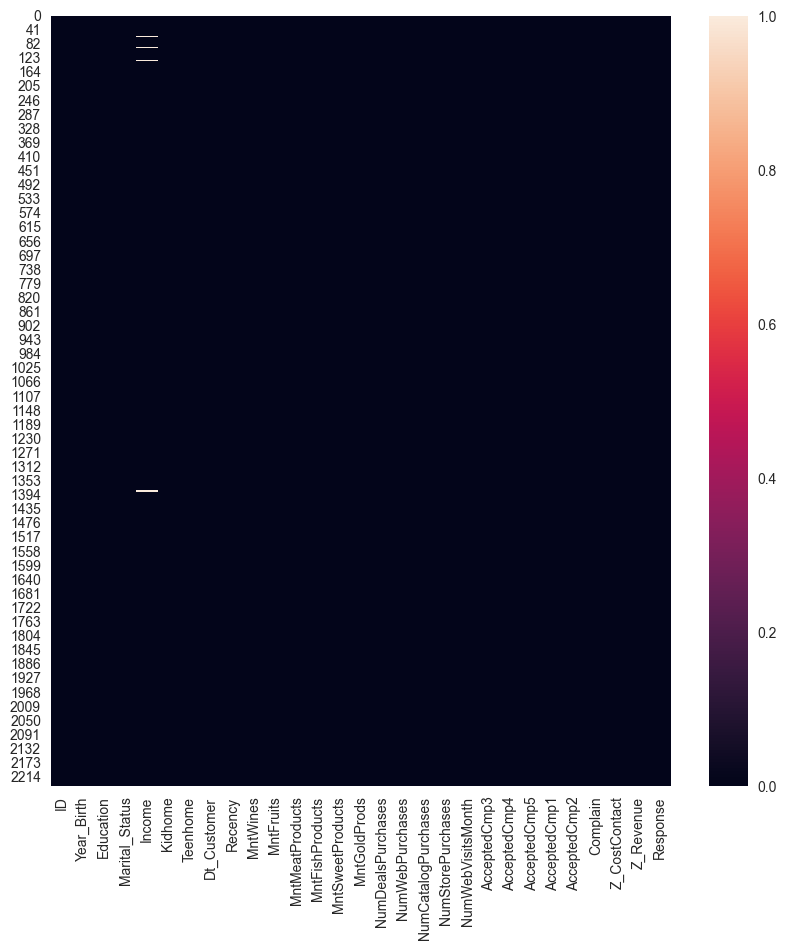

In [355]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [356]:
#Dikarenakan row kosong hanya 24 dari 2240 total data yang ada, maka data kosong akan dihapus, maka Total row data yang akan diolah menjadi 2216 row

df = df.dropna(subset =['Income'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Secara garis besar:  
* *missing value* hanya ada di kolom 'Income'
* Jumlah missing value di kolom Income ada 24 data (1.07%). Dikarenakan data missing value yang terbilang sedikit, maka kita akan menggunakan cara menghapus untuk menangani masalah *missing value*

In [357]:
# Drop missing value pada kolom income
df.dropna(inplace=True)

In [358]:
print("Nilai terbesar pertama kolom Income = {}".format(sorted(df['Income'])[-1]))
print("Nilai terbesar kedua kolom Income = {}".format(sorted(df['Income'])[-2]))
print("Terdapat perbedaan yang signifikan antara nilai max pertama dan max kedua kolom income, kemungkinan ini adalah kesalahan input income, akan kita hapus data ini")

df = df[df['Income']!=666666]
df

Nilai terbesar pertama kolom Income = 666666.0
Nilai terbesar kedua kolom Income = 162397.0
Terdapat perbedaan yang signifikan antara nilai max pertama dan max kedua kolom income, kemungkinan ini adalah kesalahan input income, akan kita hapus data ini


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Pada data awal, kolom ID memiliki tipe data integer, Dt_Customer merupakan data dengan format 'object', Sekarang akan coba dilakukan casting dari tipe 'object' menjadi 'date' agar dapat dilakukan analisis time series nantinya

In [359]:
df['ID'] = df['ID'].apply(str)
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2215 non-null   object        
 1   Year_Birth           2215 non-null   int64         
 2   Education            2215 non-null   object        
 3   Marital_Status       2215 non-null   object        
 4   Income               2215 non-null   float64       
 5   Kidhome              2215 non-null   int64         
 6   Teenhome             2215 non-null   int64         
 7   Dt_Customer          2215 non-null   datetime64[ns]
 8   Recency              2215 non-null   int64         
 9   MntWines             2215 non-null   int64         
 10  MntFruits            2215 non-null   int64         
 11  MntMeatProducts      2215 non-null   int64         
 12  MntFishProducts      2215 non-null   int64         
 13  MntSweetProducts     2215 non-null   i

In [361]:
# Cleaning 
# Dropping columns
# Hapus kolom Z_CostContact dan Z_Revenue yang tidak kita gunakan karena adanya anomali
column = ['Z_CostContact','Z_Revenue']
df = df.drop(columns = column)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


Missing Value pada kolom Income sudah dihapus sehingga barisnya sekarang 2216 dan kolomnya tetap 29.

In [362]:
# unique value in every column

pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2215,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 2139, 1371, 9909, 7286, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 11178, 2230, 7516, 7247, 11100, 4646, 3037, 1473, 1016, 4518, 9370, 8908, 8373, 7533, 2683, 3629, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953, 1956, 1992, 1961, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1973,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,662,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-02-20 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06-20 00:00:00, 2013-07-23 00:00:00, 2014-03-30 00:00:00, 2013-04-20 00:00:00, 2013-05-17 00:00:00, 2014-05-08 00:00:00, 2013

Setelah melihat nilai unik pada setiap kolom, ditemukan adanya beberapa istilah yang tidak umum, maka dari itu kita melakukan perubahan agar data menjadi lebih simple tanpa kehilangan makna dari istilah tersebut :


In [363]:

#mengubah 4 value di kolom Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd' : 'Single',
    'Alone' : 'Single'})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


Jadi sekarang kita hanya memiliki 27 kolom saja

# Data Telah Bersih

Dataset sudah selesai dibersihkan, serta sudah menghapus 2 kolom, yang awalnya dataset berisi 2240 rows dan 29 columns menjadi 2215 rows dan 27 columns.

In [364]:
df.reset_index(drop=True, inplace=True)

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2215, 27)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,object,0,2215,"[1371, 194]"
1,Year_Birth,int64,0,59,"[1973, 1946]"
2,Education,object,0,5,"[Graduation, Master]"
3,Marital_Status,object,0,5,"[Widow, Together]"
4,Income,float64,0,1973,"[57236.0, 39435.0]"
5,Kidhome,int64,0,3,"[1, 0]"
6,Teenhome,int64,0,3,"[1, 2]"
7,Dt_Customer,datetime64[ns],0,662,"[2013-10-19T00:00:00.000000000, 2014-06-26T00:00:00.000000000]"
8,Recency,int64,0,100,"[89, 2]"
9,MntWines,int64,0,776,"[1492, 1218]"


Data yang awalnya terdiri dari 2240 baris dan 29 kolom, sekarang menjadi 2215 baris dan 27 kolom, karena 2 kolom telah di drop untuk mempermudah analisis, dan 24 missing value telah dilakukan penghapusan serta 1 baris outlier pada kolom income telah dihapus.

In [365]:
df.to_csv('Supermarket Customers_cleaned.csv', index=False)

In [366]:
# Menyimpan DataFrame ke dalam file Excel
df.to_excel('Supermarket Customers_cleaned.xlsx', index=False)

# Data Analysis

Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **penyebab kenapa hanya sebagian customer saja yang sering berbelanja di supermarket Subhan's Store**. 

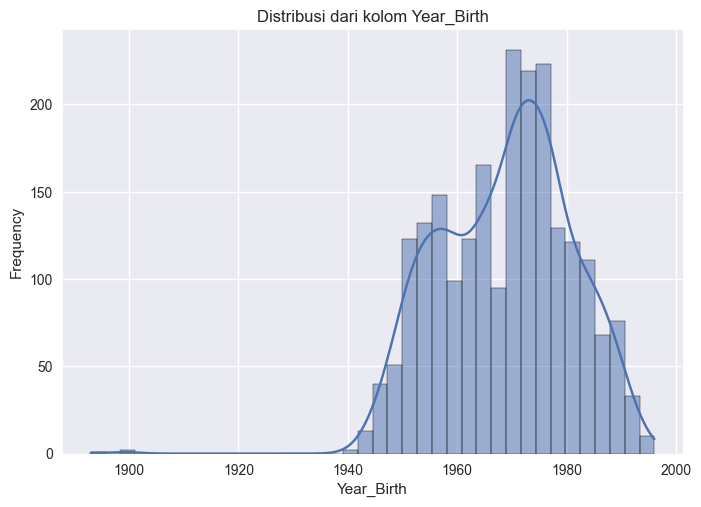

<Figure size 600x400 with 0 Axes>

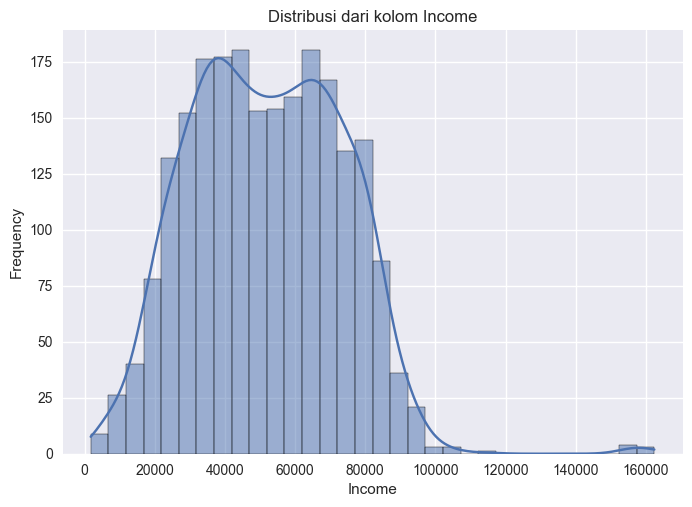

<Figure size 600x400 with 0 Axes>

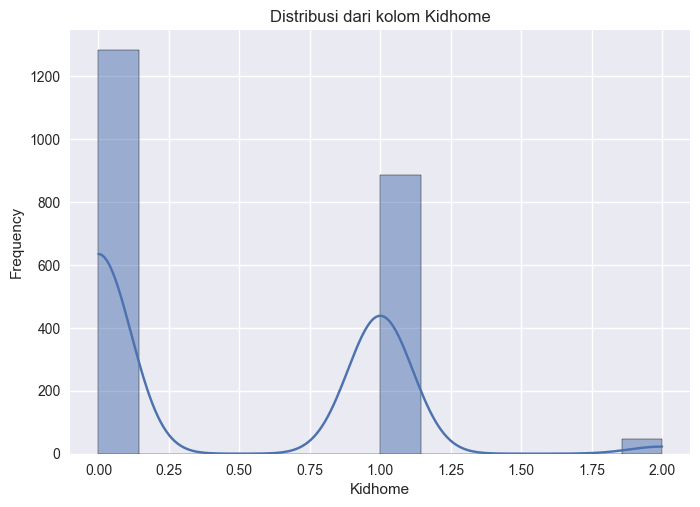

<Figure size 600x400 with 0 Axes>

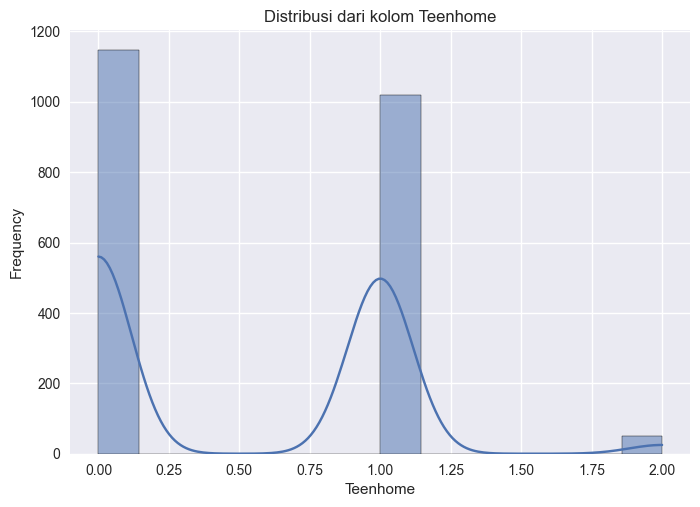

<Figure size 600x400 with 0 Axes>

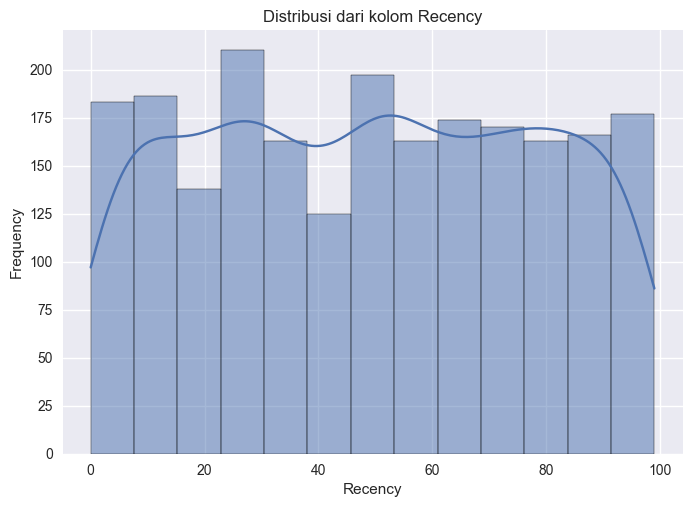

<Figure size 600x400 with 0 Axes>

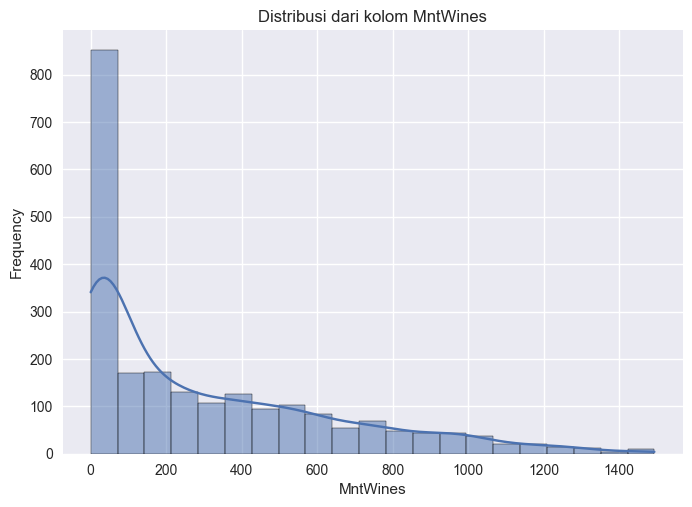

<Figure size 600x400 with 0 Axes>

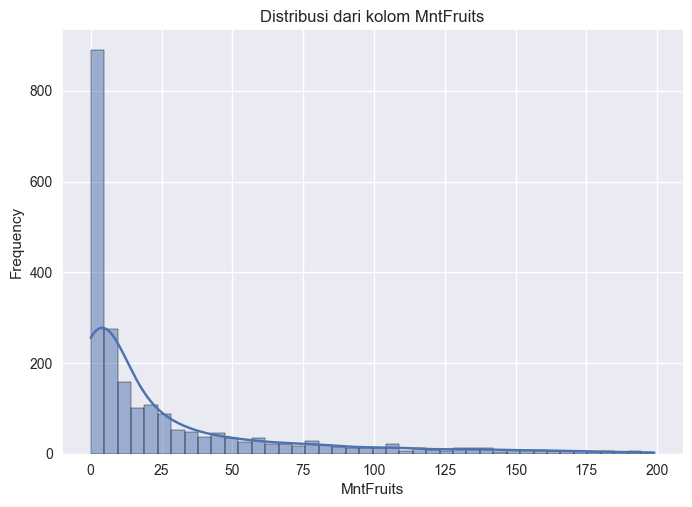

<Figure size 600x400 with 0 Axes>

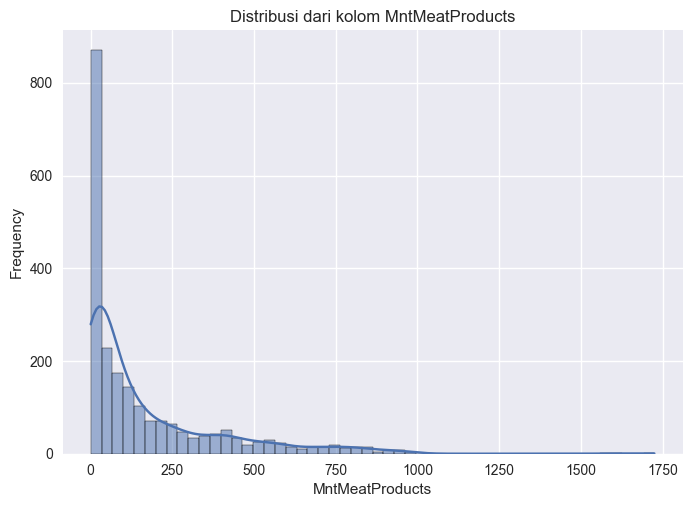

<Figure size 600x400 with 0 Axes>

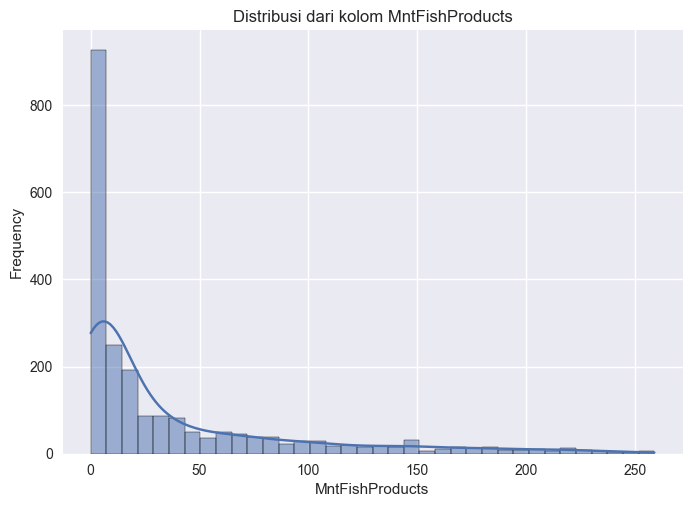

<Figure size 600x400 with 0 Axes>

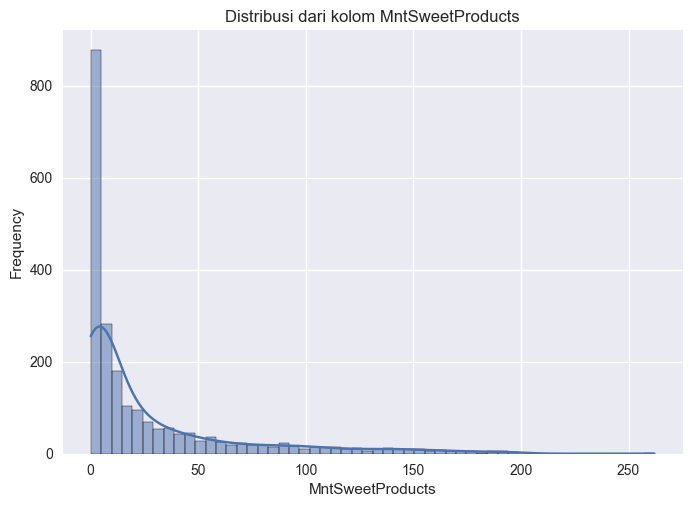

<Figure size 600x400 with 0 Axes>

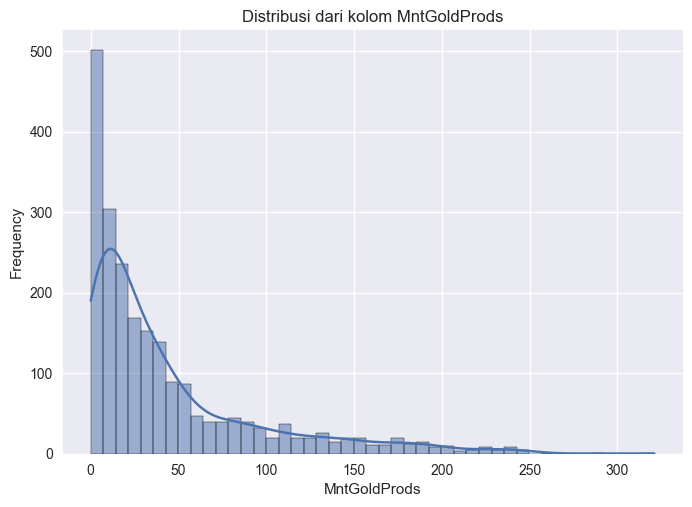

<Figure size 600x400 with 0 Axes>

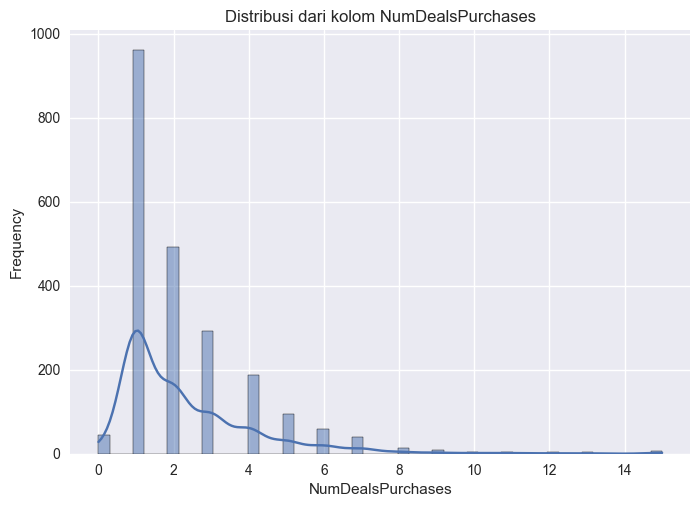

<Figure size 600x400 with 0 Axes>

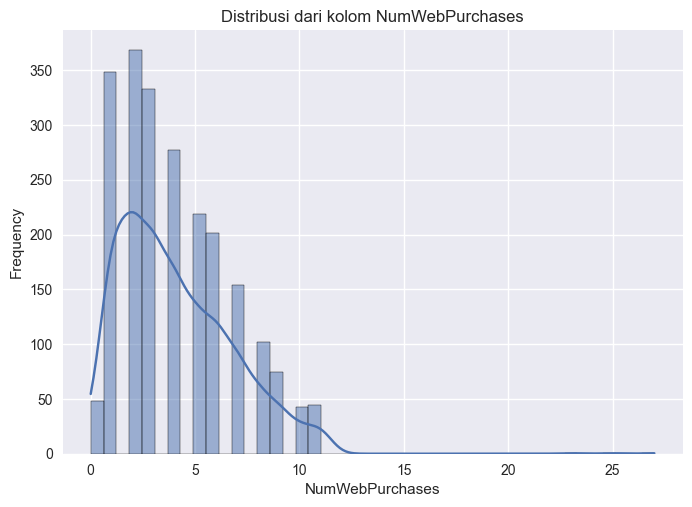

<Figure size 600x400 with 0 Axes>

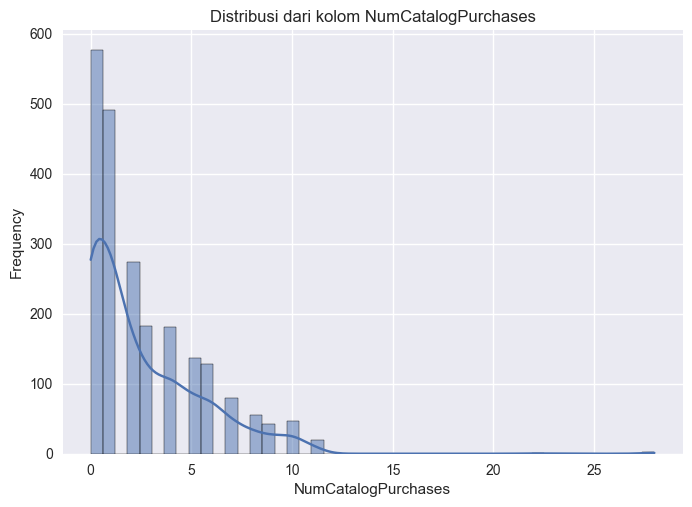

<Figure size 600x400 with 0 Axes>

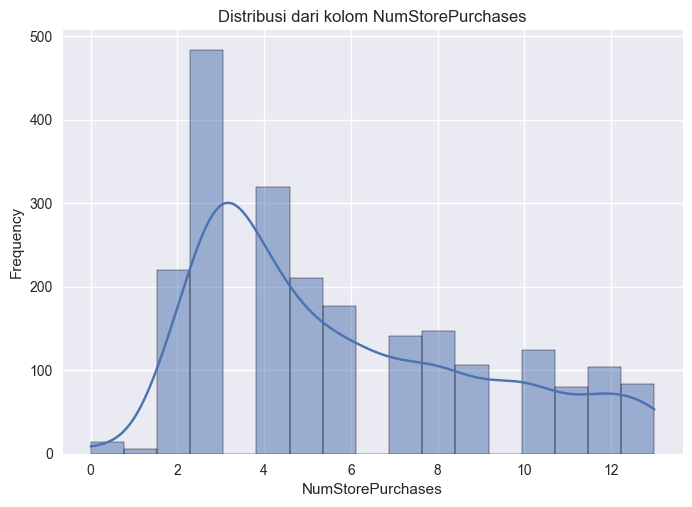

<Figure size 600x400 with 0 Axes>

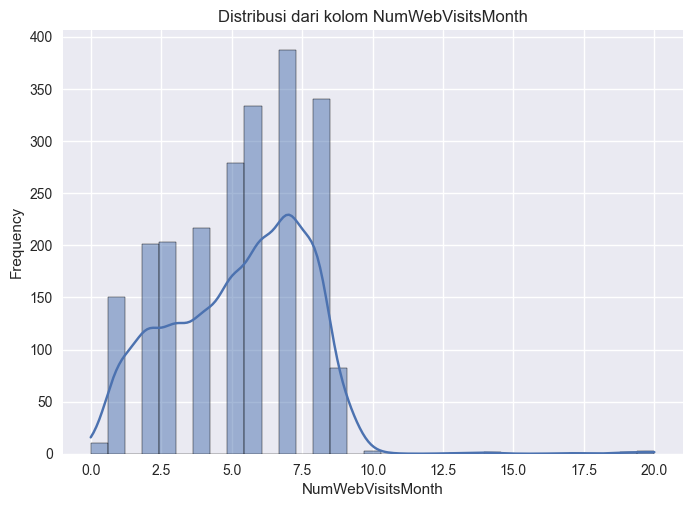

<Figure size 600x400 with 0 Axes>

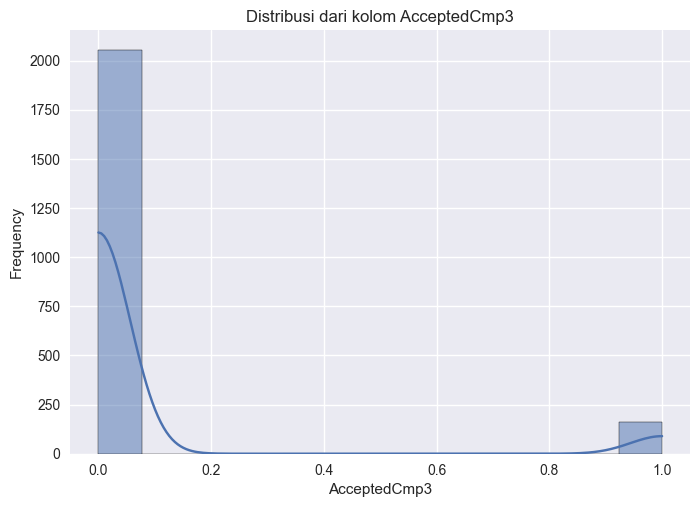

<Figure size 600x400 with 0 Axes>

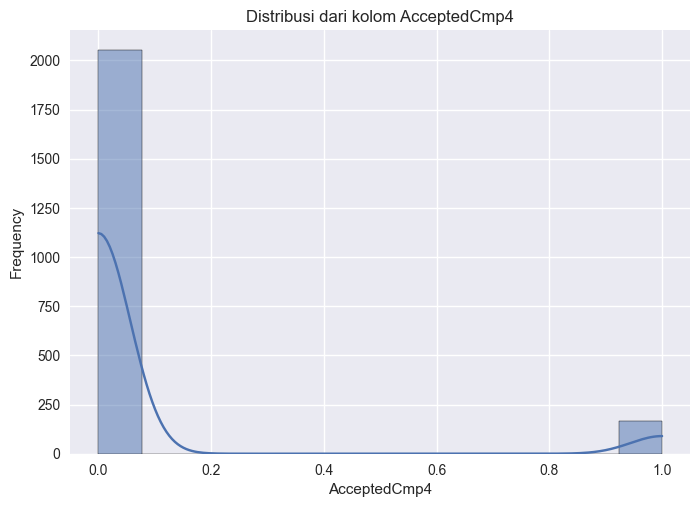

<Figure size 600x400 with 0 Axes>

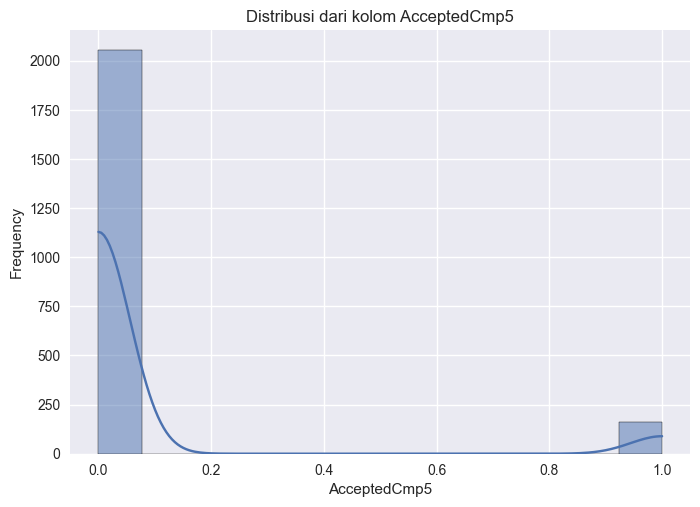

<Figure size 600x400 with 0 Axes>

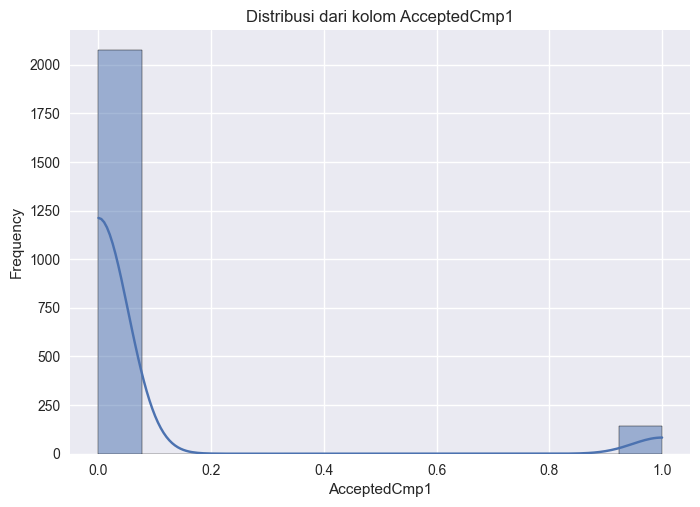

<Figure size 600x400 with 0 Axes>

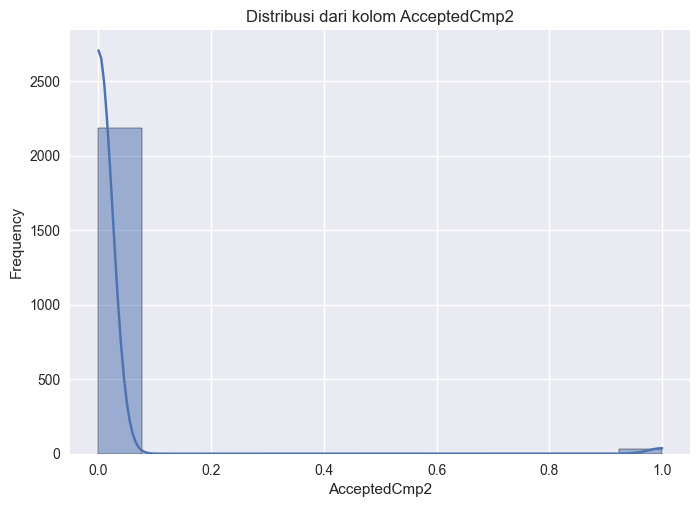

<Figure size 600x400 with 0 Axes>

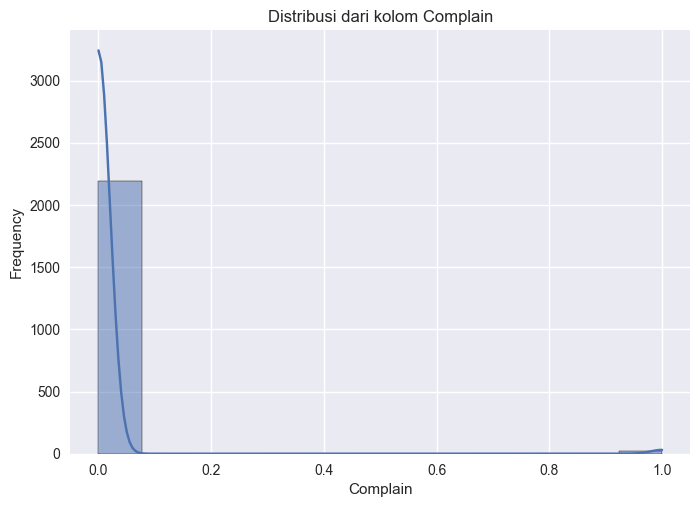

<Figure size 600x400 with 0 Axes>

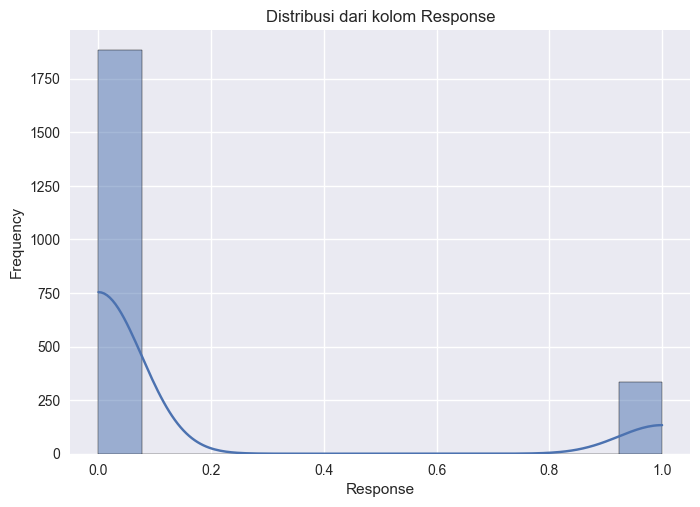

<Figure size 600x400 with 0 Axes>

In [367]:
# Checking normality
# Menggunakan cara visual
# Loop in df
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    # Create a histogram using Seaborn
    sns.histplot(data=df[column], kde=True)

    # Set title and labels
    plt.title(f'Distribusi dari kolom {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Setting the width and height of figure
    plt.figure(figsize=(6,4))

    # Show the plot
    plt.show()

**Analisis berdasarkan customer**

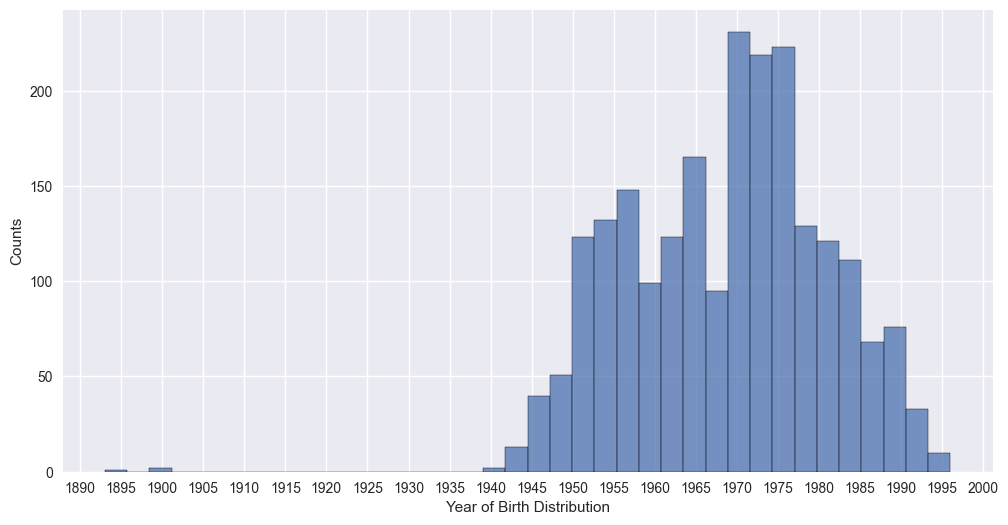

In [368]:

plt.figure(figsize = (12,6))
plt.xticks(list(range(0,2005,5)))
plt.ylabel('Counts')
plt.xlabel('Year of Birth Distribution')
sns.histplot(df['Year_Birth'])
plt.show()

Dari informasi tersebut, tampaknya sebagian besar pelanggan yang berbelanja di Supermarket Subhan's Store lahir pada tahun 1970 hingga 1980. Di sisi lain, tahun 1895 hingga 1900 mungkin bisa dianggap sebagai outlier karena jumlah pelanggannya sedikit dan jauh berbeda dari rentang tahun dominan tersebut, yaitu 1970 hingga 1980.

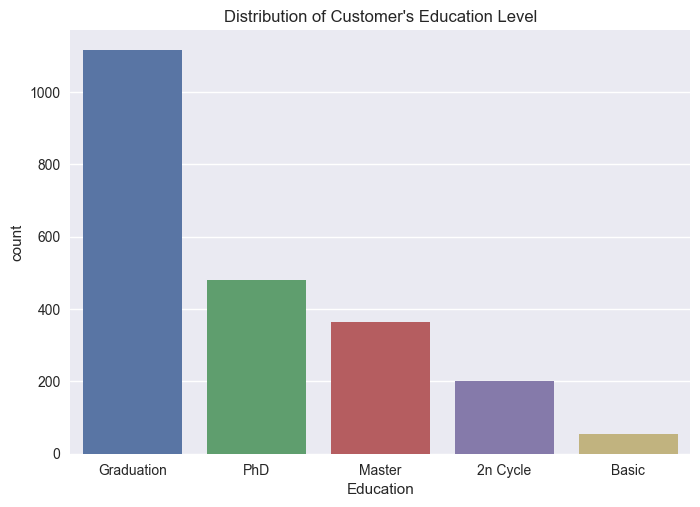

In [369]:

sns.countplot(x = df.Education, order = df.Education.value_counts().index);
plt.title("Distribution of Customer's Education Level")
plt.show()

Dari data tersebut, terlihat bahwa ada lebih banyak pelanggan dengan tingkat pendidikan Graduation dibandingkan dengan PhD dan Master. Sebaliknya, tingkat pendidikan 2n Cycle dan Basic menunjukkan jumlah yang paling sedikit dibandingkan dengan tingkat pendidikan lainnya.

In [370]:
status = df.Marital_Status.value_counts()
status

Marital_Status
Married     857
Together    572
Single      478
Divorced    232
Widow       76 
Name: count, dtype: int64

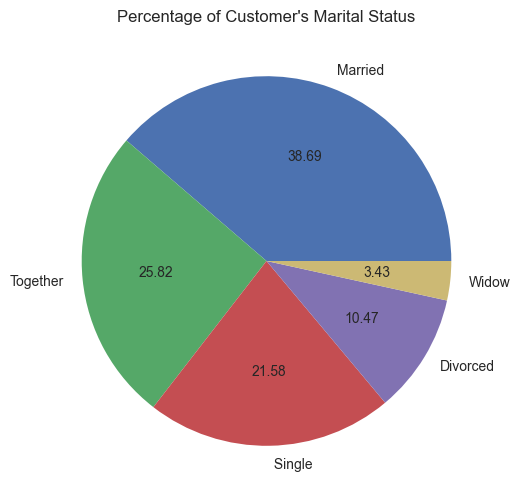

In [371]:
plt.figure(figsize=(8,6))
plt.pie(x = status,
        labels = ['Married', 'Together', ' Single', 'Divorced', 'Widow'],
        autopct = '%.2f',
        )
plt.title('Percentage of Customer\'s Marital Status')
plt.show()

Dari pie chart di atas, terlihat bahwa persentase paling besar adalah pelanggan dengan status Married atau menikah, sedangkan yang paling kecil adalah Widow.


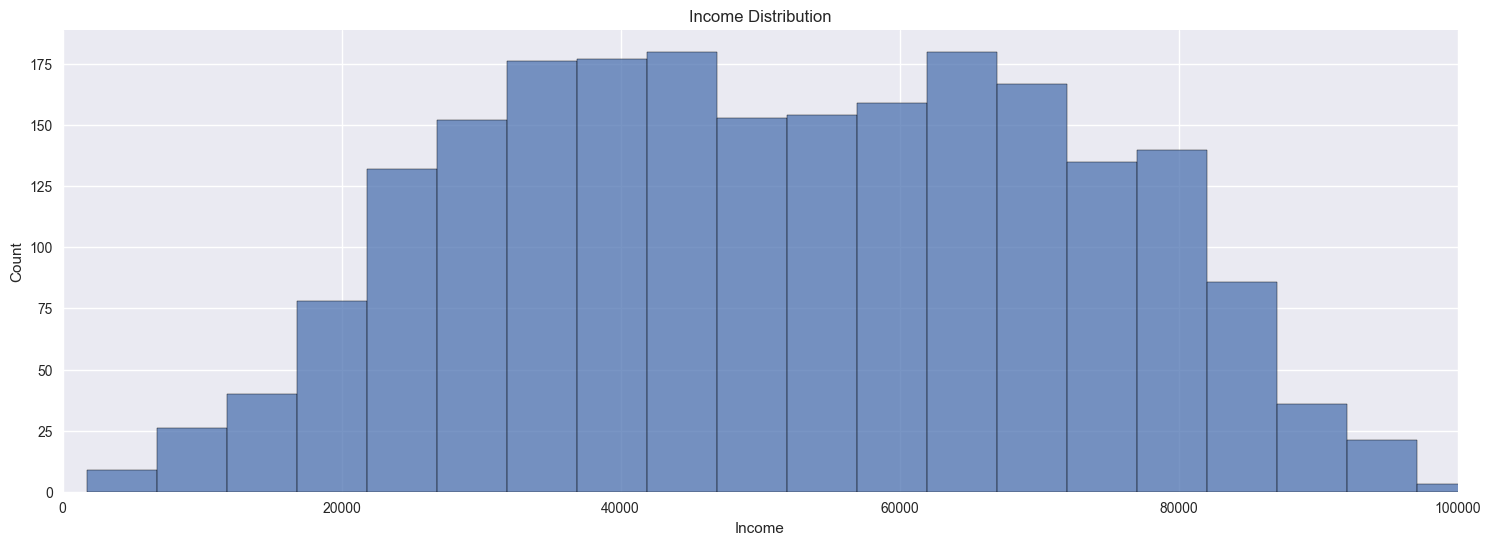

In [372]:
plt.style.use('seaborn')
plt.figure(figsize=(18,6))
plt.xlim([0, 100000])
sns.histplot(df['Income'])
plt.title('Income Distribution')
plt.show()

Dari Barplot diatas, terlihat bahwa rata-rata pendapatan pelanggan per tahun adalah 35.000 sampai dengan 65.000

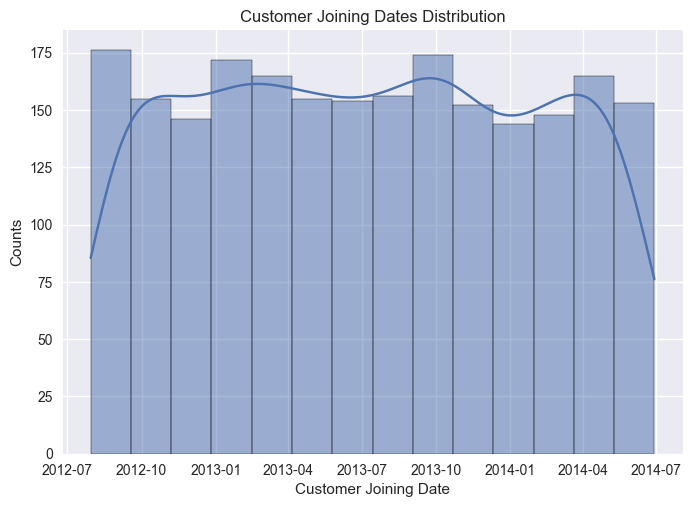

In [373]:

sns.histplot(pd.to_datetime(df['Dt_Customer']), kde = True)
plt.xlabel('Customer Joining Date')
plt.ylabel('Counts')
plt.title('Customer Joining Dates Distribution')
plt.show()

Histogram tersebut menggambarkan bahwa ada peningkatan yang signifikan dalam jumlah pelanggan yang mulai berlangganan sejak bulan Januari 2012, yang kemudian mengalami penurunan pada bulan Januari 2014. Tahun 2012 juga menandai periode di mana jumlah pelanggan yang bergabung paling banyak.

**Analisis berdasarkan product**

In [374]:
avg_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].mean(axis=0)
avg_product

pie_chart = px.pie(
    values = avg_product.values,
    names = avg_product.index,
    color_discrete_sequence = px.colors.qualitative.Pastel)

pie_chart.update_layout(title_text='Percentage of Most Buying Products', title_x = 0.5)

Dari pie chart diatas, menunjukkan bahwa produk Wine paling sering dibeli oleh pelanggan, sedangkan Fruits paling jarang dibeli oleh pelanggan

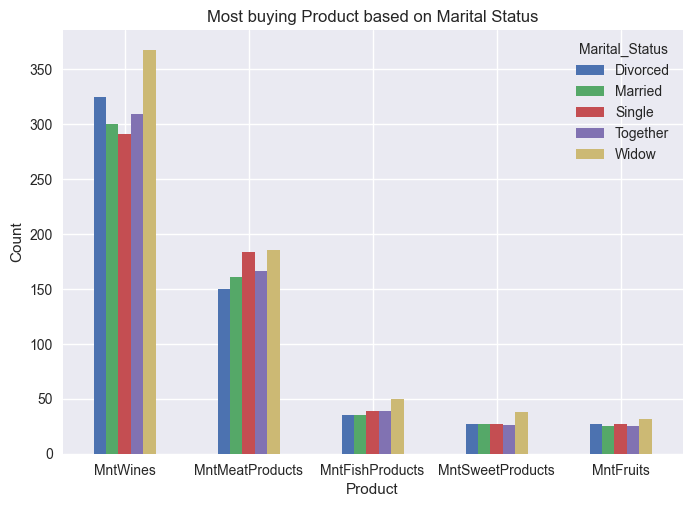

In [375]:
product = df.groupby('Marital_Status')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']].mean().T

product.plot(kind='bar', rot=0);
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Most buying Product based on Marital Status')
plt.show()

Dari barplot diatas, produk yang paling banyak dibeli berdasarkan status perkawinan adalah Wines.


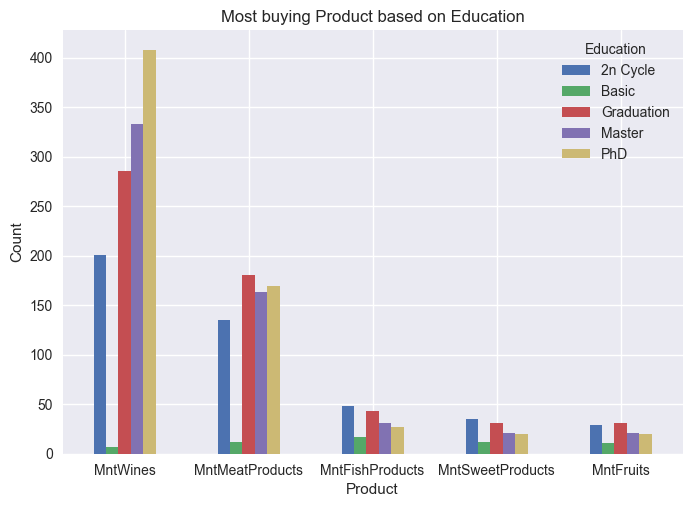

In [376]:

product = df.groupby('Education')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']].mean().T

product.plot(kind='bar', rot=0);
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Most buying Product based on Education')
plt.show()

Dari barplot diatas, produk yang paling banyak dibeli berdasarkan status pendidikan adalah Wines.


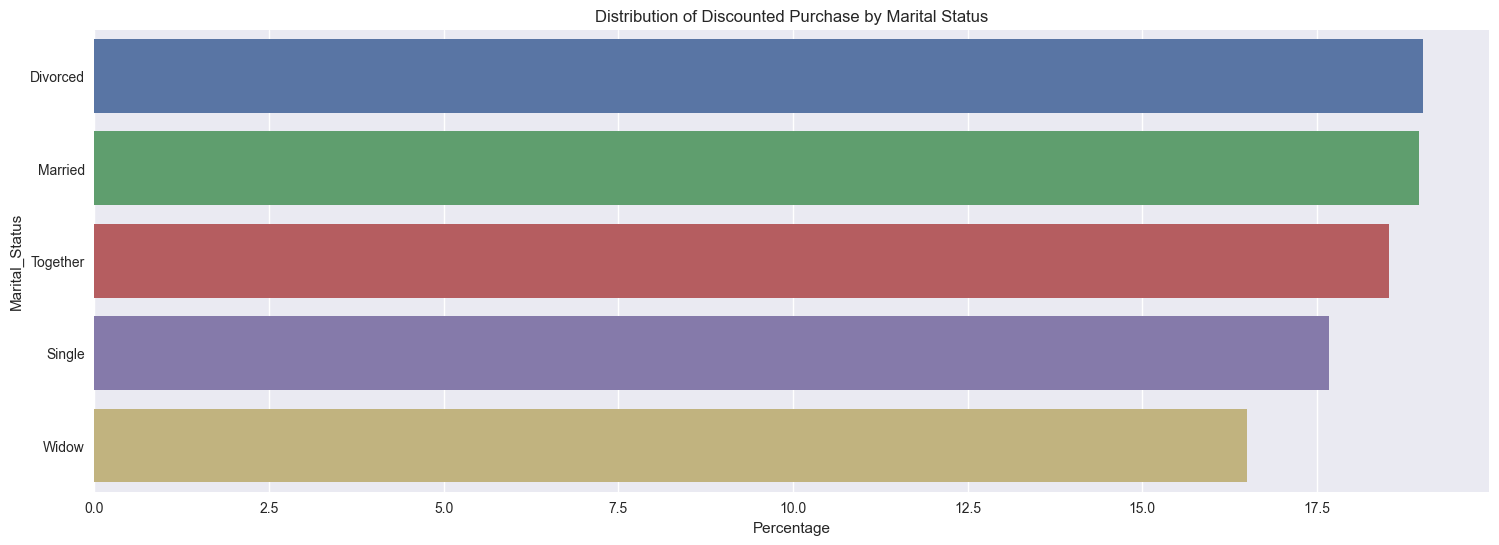

In [377]:
discount_purchases = df.groupby('Marital_Status').NumDealsPurchases.sum()
total_purchases = df.groupby('Marital_Status')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sum(axis=1)

percentage_purchases = round(discount_purchases*100/total_purchases, 2).sort_values(ascending=0)
plt.figure(figsize = (18,6))
sns.barplot(x =percentage_purchases.values,
            y =percentage_purchases.index,
             data = df,
            )
plt.xlabel('Percentage')
plt.title('Distribution of Discounted Purchase by Marital Status')
plt.show()

Dari barplot diatas, menunjukkan bahwa pembelian diskon di dominasi oleh pelanggan dengan status Divorced atau bercerai dan Married atau menikah.

**Analisis berdasarkan promotion**

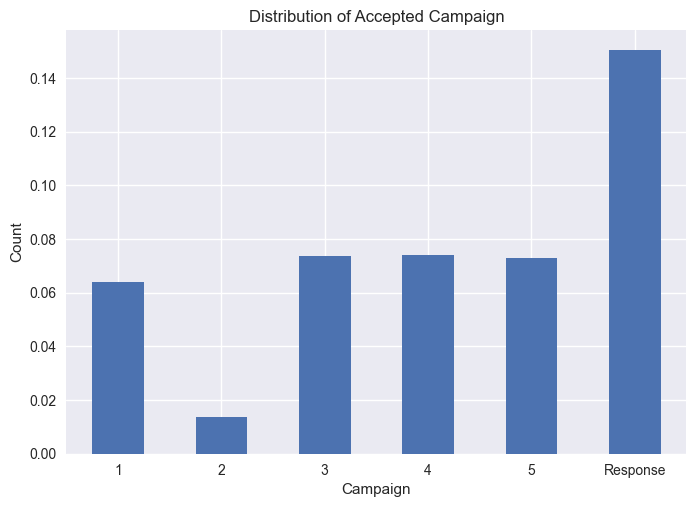

In [378]:
accepted = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0) / len(df)
fig,ax = plt.subplots()
accepted.plot(kind='bar', rot=0);
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.title('Distribution of Accepted Campaign')
ax.set_xticklabels(['1', '2', '3', '4', '5', 'Response'])
plt.show()

Dari Distribusi diatas, dapat dilihat bahwa pelanggan lebih tertarik berbelanja dari campaign/ promosi yang terakhir


In [379]:

accepted = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0) / len(df)

pie_chart = px.pie(
    values = accepted.values,
    names = accepted.index,
    color_discrete_sequence = px.colors.qualitative.Pastel)

pie_chart.update_layout(title_text='Percentage of Accepted Campaign', title_x = 0.5)

Response atau penawaran yang diterima dari promosi terakhir menunjukkan angka persentase yang paling besar yaitu 33,5%, sedangkan AcceptedCmp2 (penawaran yang diterima dari promosi ke dua) adalah persentase yang terendah dengan persentase 3,02%

**Analisis berdasarkan Tempat Pembelian**

In [381]:
places = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=0) / len(df)

pie_chart = px.pie(
    values = places.values,
    names = places.index,
    color_discrete_sequence = px.colors.qualitative.Pastel)

pie_chart.update_layout(title_text='Percentage of Most Buying Places', title_x = 0.5)

Dari pie chart diatas, menunjukkan bahwa pembelian di Store paling besar dibandingkan dengan web dan catalog

# Kesimpulan dan Rekomendasi

**Kesimpulan**

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan untuk menaikan angka Recency Customer :
* Pelanggan Supermarket Subhan's Store paling banyak tahun kelahiran 1970 hingga 1980.
* Pelanggan mulai berlangganan sejak Januari 2012. Jumlah pelanggan yang bergabung naik signifikan sejak Juli 2012 namun menurun di bulan Januari 2014.
* Ditemukan seiring banyaknya customer yang mengikuti promo campaign, maka biasanya customer tersebut semakin sering berbelanja dalam waktu dekat.
* umlah pelanggan yang tidak memiliki anak/remaja atau setidaknya 1 anak/ remaja lebih banyak dibanding pelanggan yang memiliki lebih dari 1 anak/remaja
* Promosi yang berhasil menarik minat pembeli adalah promosi yang dikirimkan paling akhir
* Tempat berbelanja yang paling diminati pelanggan setelah mendapatkan promosi adalah langsung di toko.

**Rekomendasi:**

1. **Segmentasi Pasar:**
   - **Usia dan Minat dalam Berbelanja:** Lakukan analisis lebih lanjut untuk menentukan apakah terdapat hubungan antara usia pelanggan dan minat dalam berbelanja. Segmentasi pasar berdasarkan preferensi dan perilaku belanja dapat membantu dalam menyusun strategi pemasaran yang lebih efektif.
   - **Status Pernikahan dan Pembelian:** Teliti apakah terdapat korelasi antara status pernikahan pelanggan dan pola pembelian. Dengan memahami hubungan ini, kita dapat menyesuaikan penawaran dan promosi untuk masing-masing segmen pelanggan.
   - **Pendidikan dan Pola Pembelian:** Analisis lebih lanjut tentang perbedaan pola pembelian berdasarkan latar belakang pendidikan pelanggan. Hal ini dapat membantu dalam menyusun strategi pemasaran yang lebih terarah dan efisien.

2. **Strategi Kampanye:**
   - **Penarikan Pelanggan Baru:** Berdasarkan temuan bahwa pelanggan paling banyak bergabung sejak Januari 2012, fokuskan upaya pemasaran pada menarik pelanggan baru dengan kampanye yang menarik, seperti diskon besar atau hadiah bagi pelanggan baru.
   - **Meningkatkan Penjualan:** Dengan mengetahui bahwa banyaknya pelanggan yang mengikuti promosi meningkatkan kecenderungan untuk berbelanja, pertimbangkan untuk meningkatkan frekuensi promosi dan mengirimkan promosi yang menarik secara teratur kepada pelanggan. Selain itu, pertimbangkan untuk mengadakan program loyalitas atau diskon khusus untuk pelanggan yang telah lama setia.

Dengan menerapkan rekomendasi ini, diharapkan dapat meningkatkan efektivitas segmentasi pasar, menarik lebih banyak pelanggan baru, dan meningkatkan penjualan secara keseluruhan.